In [21]:
import pandas as pd
from pathlib import Path
import numpy  as np
from sklearn.model_selection import train_test_split

In [10]:
from pandas_ods_reader import read_ods

In [11]:
this_dir = Path.cwd()
dataset_file = this_dir / "pd_speech_features.ods"
df = pd.read_excel(dataset_file, header=[0, 1], engine="odf")


In [12]:
df.head()

Basic Info        Baseline Features                              \
          id gender               PPE      DFA     RPDE numPulses   
0          0      1           0.85247  0.71826  0.57227       240   
1          0      1           0.76686  0.69481  0.53966       234   
2          0      1           0.85083  0.67604  0.58982       232   
3          1      0           0.41121  0.79672  0.59257       178   
4          1      0           0.32790  0.79782  0.53028       236   

                                                                     ...  \
  numPeriodsPulses meanPeriodPulses stdDevPeriodPulses locPctJitter  ...   
0              239         0.008064           0.000087      0.00218  ...   
1              233         0.008258           0.000073      0.00195  ...   
2              231         0.008340           0.000060      0.00176  ...   
3              177         0.010858           0.000183      0.00419  ...   
4              235         0.008162           0.002669      0.00535  ...   

              TQWT Features                            \
  tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29   
0                    1.5620                    2.6445   
1                    1.5589                    3.6107   
2                    1.5643                    2.3308   
3                    3.7805                    3.5664   
4                    6.1727                    5.8416   

                                                       \
  tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31   
0                    3.8686                    4.2105   
1                   23.5155                   14.1962   
2                    9.4959                   10.7458   
3                    5.2558                   14.0403   
4                    6.0805                    5.7621   

                                                       \
  tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33   
0                    5.1221                    4.4625   
1                   11.0261                    9.5082   
2                   11.0177                    4.8066   
3                    4.2235                    4.6857   
4                    7.7817                   11.6891   

                                                       \
  tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_35   
0                    2.6202                    3.0004   
1                    6.5245                    6.3431   
2                    2.9199                    3.1495   
3                    4.8460                    6.2650   
4                    8.2103                    5.0559   

                            Class  
  tqwt_kurtosisValue_dec_36 class  
0                   18.9405     1  
1                   45.1780     1  
2                    4.7666     1  
3                    4.0603     1  
4                    6.1164     1  

[5 rows x 755 columns]

In [ ]:
df.drop(columns=['Basic Info'], inplace=True)
data = df.to_numpy(dtype=np.float32)

In [16]:
data.shape

(756, 753)

In [17]:

features, labels = data[:, :-1], data[:, -1]

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)
features.shape

(756, 752)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=450) # 70% training and 30% test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((529, 752), (227, 752), (529,), (227,))

In [46]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(tol=0.1)#tolerence is 0.1
clf.fit(X_train,y_train) 

LogisticRegression(tol=0.1)

In [57]:
y_pred=clf.predict(X_test)

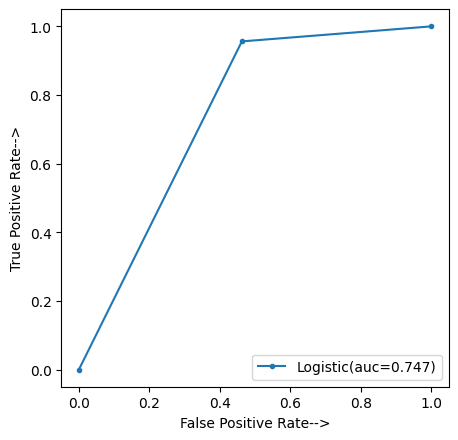

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc


In [98]:
a=cross_val_score(clf,X_train,y_train,cv=2,scoring="accuracy")#cross_validation

In [99]:
print("Accuracy is:",a.mean()*100)  

Accuracy is: 85.4416809605489


In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.54      0.65        67
         1.0       0.83      0.96      0.89       160

    accuracy                           0.83       227
   macro avg       0.83      0.75      0.77       227
weighted avg       0.83      0.83      0.82       227



In [101]:
print(f"confusion_matrix:\n{confusion_matrix(y_test,y_pred)}")


confusion_matrix:
[[ 36  31]
 [  7 153]]


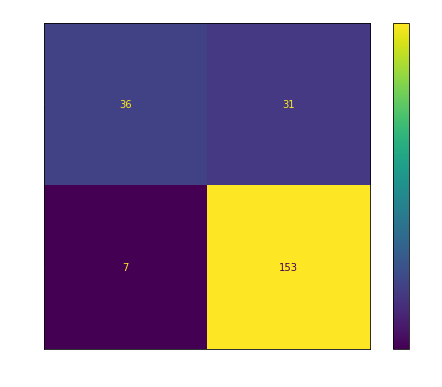

In [106]:
matrix=plot_confusion_matrix(clf,X_test,y_test)
matrix.ax_.set_title("Confusion Matrix",color="white")
plt.xlabel("Predicted Label",color="white")
plt.ylabel("True Label",color="white")
plt.gcf().axes[0].tick_params(colors="white")
plt.gcf().axes[1].tick_params(colors="white")
plt.gcf().set_size_inches(8,6)
plt.show()

In [86]:
precision,recall,thresholds=precision_recall_curve(y_test,y_pred)

In [109]:
print(f"Precision:{precision}\n\nRecall:{recall}\n\nThresholds:{thresholds}")

Precision:[0.70484581 0.83152174 1.        ]

Recall:[1.      0.95625 0.     ]

Thresholds:[0. 1.]


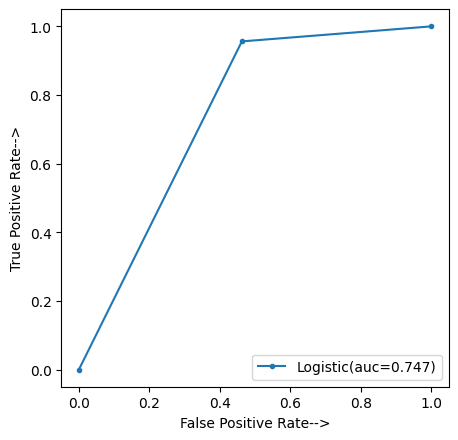

In [110]:
logistic_fpr,logistic_tpr,threshold=roc_curve(y_test,y_pred)
auc_logistic=auc(logistic_fpr,logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr,logistic_tpr,marker=".",label="Logistic(auc=%0.3f)"%auc_logistic)
plt.xlabel("False Positive Rate-->")
plt.ylabel("True Positive Rate-->")
plt.legend()
plt.show()